**IMPORTANT!!!**      
Before running the file, please make sure you have installed the required packages:  
    pandas, numpy, matplotlib, seaborn


# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Importing the data

We have a datafile with 3 sheets containing the dataset. The first step is to load the data in python. To do so, we use pandas dataframes as they are a great tool for storing and evaluating tables.

In [2]:
data=pd.read_csv('personal_data.csv',index_col='Sl No:')
spend=pd.read_csv('spend.csv',index_col='Sl No:')
repayment=pd.read_csv('repayment.csv',index_col='SL No:')

Check how our given data looks.

In [3]:
data.head()

,Customer,Age,City,Credit Card Product,Limit,Company,Segment
Sl No:,,,,,,,
1,A1,0.9285,BANGALORE,Gold,"INR 500,000.00",C1,Self Employed
2,A2,35.5346,CALCUTTA,Silver,"INR 100,000.00",C2,Salaried_MNC
3,A3,11.5593,COCHIN,Platimum,"INR 10,000.00",C3,Salaried_Pvt
4,A4,45.8203,BOMBAY,Platimum,"INR 10,001.00",C4,Govt
5,A5,69.6639,BANGALORE,Platimum,"INR 10,002.00",C5,Normal Salary


In [4]:
spend.head()

,Costomer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,473776
2,A1,3-Jan-04,PETRO,335579
3,A1,15-Jan-04,CLOTHES,371041
4,A1,25-Jan-04,FOOD,141178
5,A1,17-Jan-05,CAMERA,398404


In [5]:
repayment.head()

,Costomer,Month,Amount
SL No:,,,
1,A1,12-Jan-04,331844.007400
2,A1,3-Jan-04,441139.807300
3,A1,15-Jan-04,32480.004010
4,A1,25-Jan-04,90636.966530
5,A1,17-Jan-05,1581.969829


# Sanity Checks-Data Cleaning/Data Preprocessing

These are necesaary for proper data consumption.

## 1. DATA

In [6]:
data.describe()

,Age
count,100.000000
mean,40.146511
std,23.629596
min,0.726500
25%,20.254125
50%,40.545700
75%,61.606950
max,78.431800


##### It can be seen that age is the only parameter in data with which we can check.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             100 non-null    object 
 1   Age                  100 non-null    float64
 2   City                 100 non-null    object 
 3   Credit Card Product  100 non-null    object 
 4   Limit                100 non-null    object 
 5   Company              100 non-null    object 
 6   Segment              100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.2+ KB


##### Thus there are no missing values in our data and hence we don't have to deal with them.

### Dealing with Age

In [8]:
data['Age'].min()

0.7265

In [9]:
data['Age'].max()

78.4318

###### Plot a histogram of the age to check for normal distribution

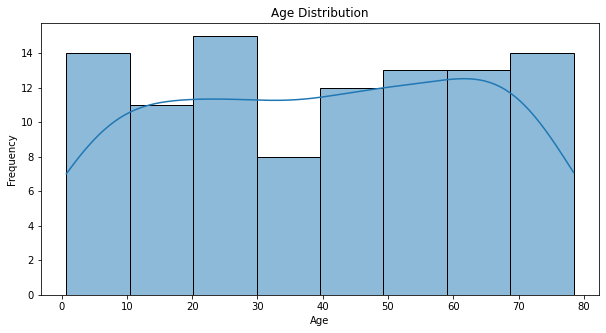

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### It can be clearly seen that age does not follow normal distribution

#### Now, as this project deals with credit card transactions and the legal age of owning a credit card is 18, so the entries where age is less than 18 are incorrect and has to be dealt with. So we have the following ways of dealing with those entries:

First let's check how many entries have age less than 18.

In [11]:
less=0
df=data['Age']<18
for i in df:
    if i is True:
        less=less+1
print(less)

22


So, we have 22 entries with age less than 18, i.e., about 22 percent of data has incorrect age.

##### 1. The first way of dealing is to just remove the entries

But we cannot employ this method here as we have only 100 entries and removing 22 would mean that we would loose so much data.

#### 2. The second way is to just remove the data in the entries

This method also cannot be employed as Age is needed in further implications.

##### 3. The third method is to replace the age with some dummy value wherever the age is less than 18

It would also not benefit us the most.

#### 4. The fourth method and the best suited for this situation is to replace all the ages below 18 by the mean age of the ages abpve 18.

Firstly calculate the mean age of the customers with age more than 18.

In [12]:
mean_age = data.loc[data['Age'] > 18, 'Age'].mean()
mean_age

49.292430769230755

Now , for all enteries below age 18, replace the age by the mean age.

In [13]:
data.loc[data['Age'] < 18, 'Age'] = mean_age

In [14]:
data.head()

,Customer,Age,City,Credit Card Product,Limit,Company,Segment
Sl No:,,,,,,,
1,A1,49.292431,BANGALORE,Gold,"INR 500,000.00",C1,Self Employed
2,A2,35.534600,CALCUTTA,Silver,"INR 100,000.00",C2,Salaried_MNC
3,A3,49.292431,COCHIN,Platimum,"INR 10,000.00",C3,Salaried_Pvt
4,A4,45.820300,BOMBAY,Platimum,"INR 10,001.00",C4,Govt
5,A5,69.663900,BANGALORE,Platimum,"INR 10,002.00",C5,Normal Salary


This ensures that we do not loose any data and also that the ages are appropriate according to the data.

#### Check if we have any age less than 18 anymore

In [15]:
less=0
df=data['Age']<18
for i in df:
    if i is True:
        less=less+1
print(less)

0


Thus we have no entry with age less than 18.

In [16]:
mean_age = data['Age'].mean()
mean_age

49.29243076923076

Also the mean remains the same after the replacement.

###### Plot a histogram of the age to check for normal distribution

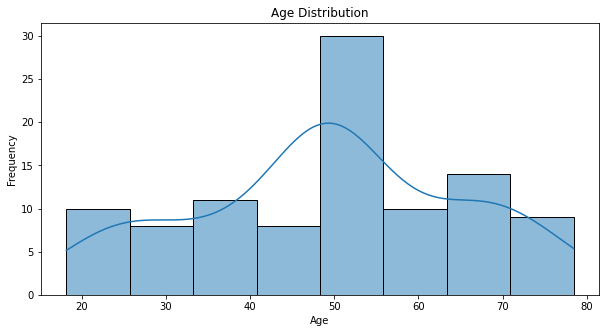

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Now the age clearly follows normal distribution as well which is very important statistically.

#### Thus we have done the data preprocessing for the data.

## 2. SPEND

In [18]:
spend.describe()

,Amount
count,1500.000000
mean,254234.696667
std,145872.915361
min,783.000000
25%,121632.000000
50%,262959.000000
75%,381925.750000
max,499682.000000


In [19]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Costomer  1500 non-null   object
 1   Month     1500 non-null   object
 2   Type      1500 non-null   object
 3   Amount    1500 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 58.6+ KB


Thus it can be seen that we have no missing/null values here.

#### Since all the tasks are on montly basis, convert the month column to datetime format so as to extract the month and year from it

In [20]:
spend['Month']=pd.to_datetime(spend['Month'])

#### Extract the year and month

In [21]:
spend['year_month'] = spend['Month'].dt.strftime('%Y-%m')

#### Sort the values based on customer and date- just for better operations

In [22]:
def sort_key(val):
    return int(val[1:])

In [23]:
spend = spend.sort_values(by=['Costomer', 'year_month'], key=lambda x: x.map(sort_key) if x.name == 'Costomer' else x)

#### Reset the index

In [24]:
spend.reset_index(drop=True, inplace=True)

In [25]:
spend.head()

,Costomer,Month,Type,Amount,year_month
0,A1,2004-01-12,JEWELLERY,473776,2004-01
1,A1,2004-01-03,PETRO,335579,2004-01
2,A1,2004-01-15,CLOTHES,371041,2004-01
3,A1,2004-01-25,FOOD,141178,2004-01
4,A1,2004-01-12,TRAIN TICKET,52225,2004-01


## 3. REPAYMENT

In [26]:
repayment.describe()

,Amount
count,1500.000000
mean,247472.296083
std,143530.648485
min,183.218203
25%,120422.872350
50%,247332.616550
75%,369014.873200
max,499344.940200


In [27]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Costomer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


Thus it can be seen that we have no missing/null values here.

#### Do all the steps done in spend here as well.

#### Convert the month column to datetime format so as to extract the month and year from it

In [28]:
repayment['Month']=pd.to_datetime(repayment['Month'])

#### Extract the year and month

In [29]:
repayment['year_month'] = repayment['Month'].dt.strftime('%Y-%m')

#### Sort the values based on customer

In [30]:
def sort_key(val):
    return int(val[1:])

In [31]:
repayment = repayment.sort_values(by=['Costomer', 'year_month'], key=lambda x: x.map(sort_key) if x.name == 'Costomer' else x)

#### Reset the index


In [32]:
repayment.reset_index(drop=True, inplace=True)

In [33]:
repayment.head()

,Costomer,Month,Amount,year_month
0,A1,2004-01-12,331844.00740,2004-01
1,A1,2004-01-03,441139.80730,2004-01
2,A1,2004-01-15,32480.00401,2004-01
3,A1,2004-01-25,90636.96653,2004-01
4,A1,2004-01-12,390074.79000,2004-01


#### Thus, we have concluded all the necessary sanity checks for the given data and can proceed to the tasks.

# Tasks

## Task1-Monthly Spend of each customer

Such a task can be performed by grouping the customers monthly and calculating the sum of amount spent. In python, this is done using the **groupby()** function.

In [34]:
monthly_spend = spend.groupby(['Costomer', 'year_month']).sum('Amount').reset_index()

The output we got displays the month and year in numbers format, so we can change it to view month in words as it seems more appropriate that way.

#### Make it more appropriate to see

In [35]:
monthly_spend['year_month']=pd.to_datetime(monthly_spend['year_month'])
monthly_spend['Year'] = monthly_spend['year_month'].dt.year
monthly_spend['Month'] = monthly_spend['year_month'].dt.month
monthly_spend['Month'] = monthly_spend['Month'].apply(lambda x: calendar.month_name[x])
monthly_spend = monthly_spend.sort_values(by=['Costomer','year_month'], key=lambda x: x.map(sort_key) if x.name == 'Costomer' else x)

In [36]:
monthly_spend.drop(columns=['year_month'],inplace=True)
monthly_spend = monthly_spend[['Costomer', 'Month', 'Year', 'Amount']]
monthly_spend['Month'] = monthly_spend['Month'].astype(str) + '-' + monthly_spend['Year'].astype(str)
monthly_spend.drop(columns=['Year'],inplace=True)
monthly_spend.reset_index(drop=True, inplace=True)

### OUTPUT

In [37]:
monthly_spend

,Costomer,Month,Amount
0,A1,January-2004,1511173
1,A1,February-2004,41381
2,A1,May-2004,131197
3,A1,January-2005,398404
4,A1,February-2005,1404194
...,...,...,...
802,A96,January-2004,320364
803,A97,January-2004,164330
804,A98,January-2004,87484
805,A99,January-2004,476020


#### Save the dataframe in a new csv file

In [38]:
# monthly_spend.to_csv('Task1.csv')

## Task 2-Monthly repayment of each customer

The procedure for finding the monthly repayment is similar to that of monthly spend

In [39]:
monthly_repayment = repayment.groupby(['Costomer', 'year_month']).sum('Amount').reset_index()

#### Make it more appropriate to see

In [40]:
monthly_repayment['year_month']=pd.to_datetime(monthly_repayment['year_month'])
monthly_repayment['Year'] = monthly_repayment['year_month'].dt.year
monthly_repayment['Month'] = monthly_repayment['year_month'].dt.month
monthly_repayment['Month'] = monthly_repayment['Month'].apply(lambda x: calendar.month_name[x])
monthly_repayment = monthly_repayment.sort_values(by=['Costomer','year_month'], key=lambda x: x.map(sort_key) if x.name == 'Costomer' else x)

In [41]:
monthly_repayment.drop(columns=['year_month'],inplace=True)
monthly_repayment = monthly_repayment[['Costomer', 'Month', 'Year', 'Amount']]
monthly_repayment['Month'] = monthly_repayment['Month'].astype(str) + '-' + monthly_repayment['Year'].astype(str)
monthly_repayment.drop(columns=['Year'],inplace=True)
monthly_repayment.reset_index(drop=True, inplace=True)

### OUTPUT

In [42]:
monthly_repayment

,Costomer,Month,Amount
0,A1,January-2004,1.362775e+06
1,A1,February-2004,1.911800e+05
2,A1,January-2005,1.581970e+03
3,A1,February-2005,1.199808e+06
4,A1,July-2005,3.005817e+05
...,...,...,...
793,A96,January-2004,1.101390e+05
794,A97,January-2004,1.746064e+05
795,A98,January-2004,9.780260e+04
796,A99,January-2004,3.585899e+05


#### Save the dataframe in a new csv file

In [43]:
# monthly_repayment.to_csv('Task2.csv')

## Task 3-Highest paying 10 customers.

The task is to find the highest paying 10 customers, so first we'll be doing it on monthly basis and then we'll find the top 10 highest paying customers of all time for better understanding of the task.

Basically, we just have to find the 10 highest paying customer, i.e, top 10 customers with highest spending in each month.

In [44]:
spend.head()

,Costomer,Month,Type,Amount,year_month
0,A1,2004-01-12,JEWELLERY,473776,2004-01
1,A1,2004-01-03,PETRO,335579,2004-01
2,A1,2004-01-15,CLOTHES,371041,2004-01
3,A1,2004-01-25,FOOD,141178,2004-01
4,A1,2004-01-12,TRAIN TICKET,52225,2004-01


### Highest 10 paying customers in each month

Again groupby() function will help as we need montly calculations and then we can just sort the data in decending order to get the highest paying customers. In order to get the top 10 hisghest paying customers, we can use the nlargest() function which takes the parameter 10.

In [45]:
totalSpending = spend.groupby(['Costomer', 'year_month'])['Amount'].sum().reset_index()
totalSpending = totalSpending.sort_values(by='Amount', ascending=False)
top_month = totalSpending.groupby('year_month').apply(lambda x: x.nlargest(10, 'Amount')).reset_index(drop=True)

##### Make it more appropriate to see

In [46]:
top_month['year_month']=pd.to_datetime(top_month['year_month'])
top_month['Year'] = top_month['year_month'].dt.year
top_month['Month'] = top_month['year_month'].dt.month
top_month['Month'] = top_month['Month'].apply(lambda x: calendar.month_name[x])

In [47]:
top_month.drop(columns=['year_month'],inplace=True)
top_month = top_month[['Costomer', 'Month', 'Year', 'Amount']]
top_month['Month'] = top_month['Month'].astype(str) + '-' + top_month['Year'].astype(str)
top_month.drop(columns=['Year'],inplace=True)
top_month.reset_index(drop=True, inplace=True)

### OUTPUT

In [48]:
top_month

,Costomer,Month,Amount
0,A37,January-2004,2605015
1,A39,January-2004,2417495
2,A60,January-2004,2245218
3,A40,January-2004,2233136
4,A22,January-2004,2126633
...,...,...,...
295,A36,December-2006,255209
296,A16,December-2006,220259
297,A28,December-2006,188699
298,A35,December-2006,140924


### IMPORTANT!!!!
1.Please note that for the months for which we have less than 10 customers who spend the money, we'll have that many customers only.  
2.Also for the months we had no customers, such months are excluded from the dataframe

As we can see, it is very hard to use these results and visualize them properly.  
So what we can do is find the top paying customers of all time to get a better understanding of the situation.

#### Save the dataframe in a new csv file

In [49]:
# top_month.to_csv("Task3.csv")

### Top 10 paying customers of all time-to better visualize the results

In [50]:
totalSpending = spend.groupby('Costomer')['Amount'].sum().reset_index()
totalSpending = totalSpending.sort_values(by='Amount', ascending=False)
top_customers = totalSpending.head(10).reset_index()
top_customers.drop(columns=['index'],inplace=True)

### OUTPUT

In [51]:
top_customers

,Costomer,Amount
0,A22,9637821
1,A40,9595037
2,A60,9317672
3,A61,9148466
4,A48,9056652
5,A42,8665638
6,A41,8583533
7,A39,8526679
8,A45,8498614
9,A13,8042340


#### Visualize the results

#### 1. Bar GRAPH

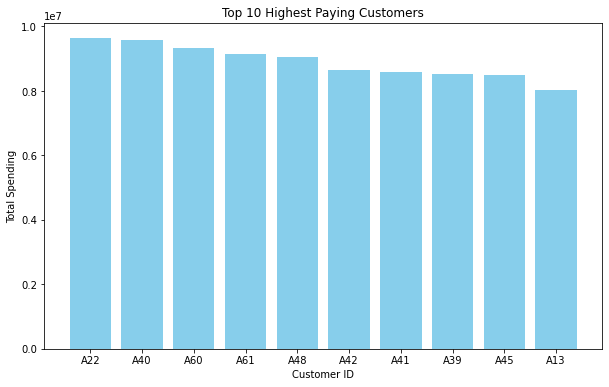

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(top_customers['Costomer'], top_customers['Amount'], color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.title('Top 10 Highest Paying Customers')
plt.xticks(top_customers['Costomer'])  # Ensure all customer IDs are shown on x-axis
plt.show()

#### 2. Pie CHART

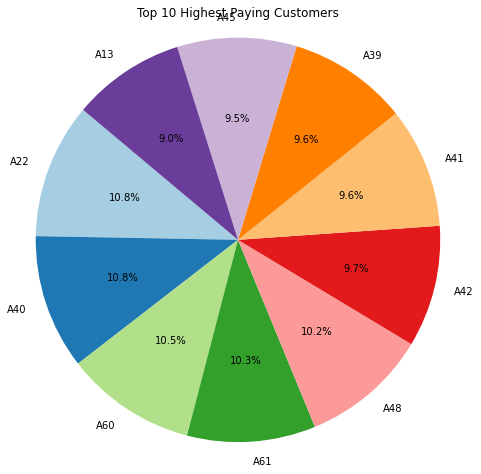

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(top_customers['Amount'], labels=top_customers['Costomer'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Highest Paying Customers')
plt.axis('equal')
plt.show()

#### Save the results


In [54]:
# top_customers.to_csv('Subtask3.csv')

## Task 4-People in which segment are spending more money.

We have to get the segment col with the amount spent to get the results so we weill use **JOIN**. It is done using merge() function.

In [55]:
spend.rename(columns={'Costomer': 'Customer'}, inplace=True)
merged_data=pd.merge(data, spend, on='Customer', how='right')
merged_data.drop(columns=['Age','City','Credit Card Product','Limit','Company'],inplace=True)

In [56]:
merged_data.head()

,Customer,Segment,Month,Type,Amount,year_month
0,A1,Self Employed,2004-01-12,JEWELLERY,473776,2004-01
1,A1,Self Employed,2004-01-03,PETRO,335579,2004-01
2,A1,Self Employed,2004-01-15,CLOTHES,371041,2004-01
3,A1,Self Employed,2004-01-25,FOOD,141178,2004-01
4,A1,Self Employed,2004-01-12,TRAIN TICKET,52225,2004-01


This merged dataframe gives us the information about the segment of each customer during each transaction.  
Now all we have to do is find the highest spending sector in each month

#### Highest spending sector in each month

In [57]:
parameter=1
totalSpending = merged_data.groupby(['year_month', 'Segment'])['Amount'].sum().reset_index()
totalSpending = totalSpending.sort_values(by='Amount', ascending=False)
top_month_Segment = totalSpending.groupby('year_month').apply(lambda x: x.nlargest(parameter, 'Amount')).reset_index(drop=True)

We have only got the highest spending segment in each month, if we want to get more of the higher spending segments in any month, all we have to do is update the **parameter**.

#### Make it more appropriate to see

In [58]:
top_month_Segment['year_month']=pd.to_datetime(top_month_Segment['year_month'])
top_month_Segment['Year'] = top_month_Segment['year_month'].dt.year
top_month_Segment['Month'] = top_month_Segment['year_month'].dt.month
top_month_Segment['Month'] = top_month_Segment['Month'].apply(lambda x: calendar.month_name[x])

In [59]:
top_month_Segment.drop(columns=['year_month'],inplace=True)
top_month_Segment = top_month_Segment[['Segment', 'Month', 'Year', 'Amount']]
top_month_Segment['Month'] = top_month_Segment['Month'].astype(str) + '-' + top_month_Segment['Year'].astype(str)
top_month_Segment.drop(columns=['Year'],inplace=True)
top_month_Segment.reset_index(drop=True, inplace=True)

### OUTPUT

In [60]:
top_month_Segment

,Segment,Month,Amount
0,Normal Salary,January-2004,22394595
1,Normal Salary,February-2004,2841896
2,Salaried_Pvt,March-2004,1277308
3,Salaried_MNC,April-2004,2262438
4,Govt,May-2004,1593276
5,Normal Salary,September-2004,1212599
6,Normal Salary,November-2004,1431529
7,Govt,January-2005,2323803
8,Self Employed,February-2005,10745033
9,Salaried_Pvt,April-2005,3558552


#### pie chart for better visualization

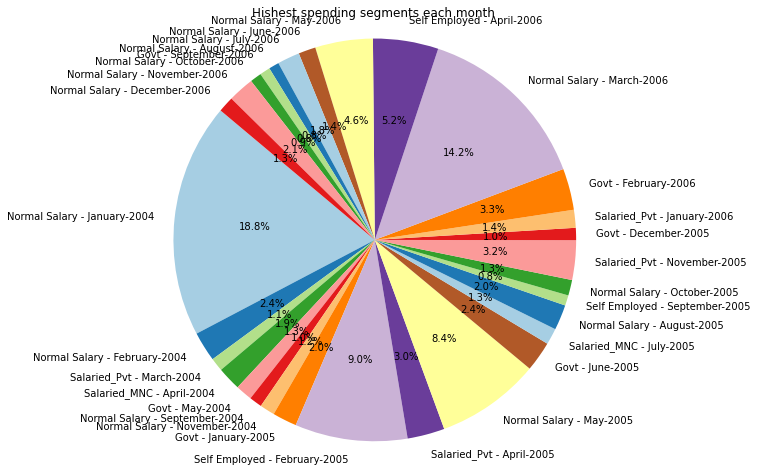

In [61]:
top_month_Segment['Label'] = top_month_Segment['Segment'] + ' - ' + top_month_Segment['Month']

plt.figure(figsize=(8, 8))
plt.pie(top_month_Segment['Amount'], labels=top_month_Segment['Label'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Hishest spending segments each month')
plt.axis('equal')
plt.show()

#### Save the dataframe in a new csv file

In [62]:
# top_month_Segment.to_csv('Task4.csv')

## Task 5-Which age group is spending more money

To solve such task, first we'll have to have the age groups as our data has no age groups but only ages

Young Adults: **18-35 years**  
Middle-aged Adults: **36-55 years**  
Older Adults: **56-65 years**  
Senior Citizens: **66 years and older**  

Now have to add these age groups to our data. The method cut() helps us do just that.

In [63]:
bins = [18,35, 55, 65, 99]
labels = ['Young Adults', 'Middle-aged Adults', 'Older Adults', 'Senior Citizens']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [64]:
data.head()

,Customer,Age,City,Credit Card Product,Limit,Company,Segment,Age Group
Sl No:,,,,,,,,
1,A1,49.292431,BANGALORE,Gold,"INR 500,000.00",C1,Self Employed,Middle-aged Adults
2,A2,35.534600,CALCUTTA,Silver,"INR 100,000.00",C2,Salaried_MNC,Middle-aged Adults
3,A3,49.292431,COCHIN,Platimum,"INR 10,000.00",C3,Salaried_Pvt,Middle-aged Adults
4,A4,45.820300,BOMBAY,Platimum,"INR 10,001.00",C4,Govt,Middle-aged Adults
5,A5,69.663900,BANGALORE,Platimum,"INR 10,002.00",C5,Normal Salary,Senior Citizens


After this, all we have to do is find the highest spending age groups.

In [65]:
merged_data=pd.merge(data, spend, on='Customer', how='right')
merged_data.drop(columns=['Age','City','Credit Card Product','Limit','Company','Segment'],inplace=True)

In [66]:
merged_data.head()

,Customer,Age Group,Month,Type,Amount,year_month
0,A1,Middle-aged Adults,2004-01-12,JEWELLERY,473776,2004-01
1,A1,Middle-aged Adults,2004-01-03,PETRO,335579,2004-01
2,A1,Middle-aged Adults,2004-01-15,CLOTHES,371041,2004-01
3,A1,Middle-aged Adults,2004-01-25,FOOD,141178,2004-01
4,A1,Middle-aged Adults,2004-01-12,TRAIN TICKET,52225,2004-01


This merged dataframe gives us the information about the age group of each customer during each transaction.  
Now all we have to do is find the highest spending sector in each month

#### Highest spending age group in each month

In [67]:
parameter=1
totalSpending = merged_data.groupby(['year_month', 'Age Group'])['Amount'].sum().reset_index()
totalSpending = totalSpending.sort_values(by='Amount', ascending=False)
top_month_Age = totalSpending.groupby('year_month').apply(lambda x: x.nlargest(parameter, 'Amount')).reset_index(drop=True)

Again the **parameter** variable can decide how many higher age groups we want for each month.

#### Make it more appropriate to see

In [68]:
top_month_Age['year_month']=pd.to_datetime(top_month_Age['year_month'])
top_month_Age['Year'] = top_month_Age['year_month'].dt.year
top_month_Age['Month'] = top_month_Age['year_month'].dt.month
top_month_Age['Month'] = top_month_Age['Month'].apply(lambda x: calendar.month_name[x])

In [69]:
top_month_Age.drop(columns=['year_month'],inplace=True)
top_month_Age = top_month_Age[['Age Group', 'Month', 'Year', 'Amount']]
top_month_Age['Month'] = top_month_Age['Month'].astype(str) + '-' + top_month_Age['Year'].astype(str)
top_month_Age.drop(columns=['Year'],inplace=True)
top_month_Age.reset_index(drop=True, inplace=True)

### OUTPUT

In [70]:
top_month_Age

,Age Group,Month,Amount
0,Middle-aged Adults,January-2004,36420452
1,Middle-aged Adults,February-2004,3017881
2,Middle-aged Adults,March-2004,2053377
3,Middle-aged Adults,April-2004,3467275
4,Middle-aged Adults,May-2004,2357354
5,Middle-aged Adults,September-2004,1584260
6,Middle-aged Adults,November-2004,2187926
7,Middle-aged Adults,January-2005,3467565
8,Middle-aged Adults,February-2005,21517642
9,Middle-aged Adults,April-2005,3685015


#### pie chart for better visualization

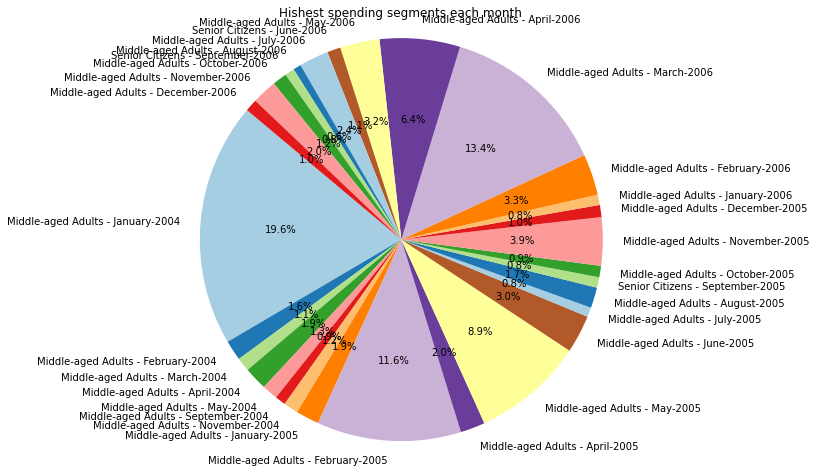

In [71]:
top_month_Age['Age Group'] = top_month_Age['Age Group'].astype(str)
top_month_Age['Label'] = top_month_Age['Age Group'] + ' - ' + top_month_Age['Month']

plt.figure(figsize=(8, 8))
plt.pie(top_month_Age['Amount'], labels=top_month_Age['Label'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Hishest spending segments each month')
plt.axis('equal')
plt.show()

#### Save the dataframe in a new csv file

In [72]:
# top_month_Age.to_csv('Task5.csv')

## Task 6-Most profitable segment

The first step is to find the profit which is basically the difference between spent and repaid amount.

In [73]:
spend.head()

,Customer,Month,Type,Amount,year_month
0,A1,2004-01-12,JEWELLERY,473776,2004-01
1,A1,2004-01-03,PETRO,335579,2004-01
2,A1,2004-01-15,CLOTHES,371041,2004-01
3,A1,2004-01-25,FOOD,141178,2004-01
4,A1,2004-01-12,TRAIN TICKET,52225,2004-01


#### Create a new dataframe that contains both the spent and repaid amount and then calculate profit from it

In [74]:
profit=spend.copy()
profit.rename(columns={'Amount':'Spend'},inplace=True)
col=repayment['Amount']
profit['Repayment']=col
profit.drop(columns=['Type','Month'],inplace=True)
profit=profit[['Customer','year_month','Spend','Repayment']]
profit['Profit']=profit['Spend']-profit['Repayment']

In [75]:
profit

,Customer,year_month,Spend,Repayment,Profit
0,A1,2004-01,473776,331844.00740,141931.99260
1,A1,2004-01,335579,441139.80730,-105560.80730
2,A1,2004-01,371041,32480.00401,338560.99599
3,A1,2004-01,141178,90636.96653,50541.03347
4,A1,2004-01,52225,390074.79000,-337849.79000
...,...,...,...,...,...
1495,A96,2004-01,320364,110139.01410,210224.98590
1496,A97,2004-01,164330,174606.39230,-10276.39230
1497,A98,2004-01,87484,97802.59900,-10318.59900
1498,A99,2004-01,476020,358589.92430,117430.07570


Now we have to get  the segment for each customer transaction.

In [76]:
merged_data=pd.merge(data, profit, on='Customer', how='right')
merged_data.drop(columns=['Age','City','Credit Card Product','Limit','Company','Age Group','Spend','Repayment'],inplace=True)
profit=merged_data.copy()

In [77]:
profit.head()

,Customer,Segment,year_month,Profit
0,A1,Self Employed,2004-01,141931.99260
1,A1,Self Employed,2004-01,-105560.80730
2,A1,Self Employed,2004-01,338560.99599
3,A1,Self Employed,2004-01,50541.03347
4,A1,Self Employed,2004-01,-337849.79000


#### Most profitable segment

In [78]:
parameter=1
totalProfit = profit.groupby(['year_month', 'Segment'])['Profit'].sum().reset_index()
totalProfit = totalProfit.sort_values(by='Profit', ascending=False)
profit_Segment = totalProfit.groupby('year_month').apply(lambda x: x.nlargest(parameter, 'Profit')).reset_index(drop=True)
profit_Segment=profit_Segment.round()

Thus we have got the segment for each month with the higest profit.

#### Make it more appropriate to see

In [79]:
profit_Segment['year_month']=pd.to_datetime(profit_Segment['year_month'])
profit_Segment['Year'] =profit_Segment['year_month'].dt.year
profit_Segment['Month'] = profit_Segment['year_month'].dt.month
profit_Segment['Month'] = profit_Segment['Month'].apply(lambda x: calendar.month_name[x])

In [80]:
profit_Segment.drop(columns=['year_month'],inplace=True)
profit_Segment = profit_Segment[['Segment', 'Month', 'Year', 'Profit']]
profit_Segment['Month'] = profit_Segment['Month'].astype(str) + '-' + profit_Segment['Year'].astype(str)
profit_Segment.drop(columns=['Year'],inplace=True)
profit_Segment.reset_index(drop=True, inplace=True)

### OUTPUT

In [81]:
profit_Segment

,Segment,Month,Profit
0,Normal Salary,January-2004,2408130.0
1,Self Employed,February-2004,782684.0
2,Self Employed,March-2004,33346.0
3,Self Employed,April-2004,377516.0
4,Govt,May-2004,747959.0
5,Salaried_MNC,September-2004,272565.0
6,Salaried_MNC,November-2004,445523.0
7,Normal Salary,January-2005,95736.0
8,Salaried_Pvt,February-2005,1289508.0
9,Salaried_Pvt,April-2005,1652050.0


#### pie chart for better visualization

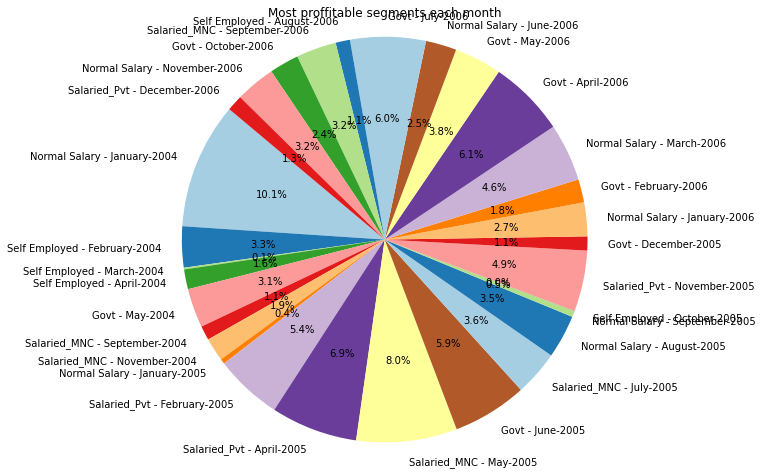

In [82]:
profit_Segment['Label'] = profit_Segment['Segment'] + ' - ' + profit_Segment['Month']

plt.figure(figsize=(8, 8))
plt.pie(profit_Segment['Profit'], labels=profit_Segment['Label'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Most proffitable segments each month')
plt.axis('equal')
plt.show()

#### Save the dataframe in a new file

In [83]:
# profit_Segment.to_csv('Task6.csv')

## Task 7- Category the customers are spending more money

We will find all the categories in which people soend most money in each month.

In [84]:
spend.head()

,Customer,Month,Type,Amount,year_month
0,A1,2004-01-12,JEWELLERY,473776,2004-01
1,A1,2004-01-03,PETRO,335579,2004-01
2,A1,2004-01-15,CLOTHES,371041,2004-01
3,A1,2004-01-25,FOOD,141178,2004-01
4,A1,2004-01-12,TRAIN TICKET,52225,2004-01


Check how many categories there are in which people are spending the money.

In [85]:
spend['Type'].unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'TRAIN TICKET',
       'BUS TICKET', 'CAMERA', 'SANDALS', 'CAR', 'MOVIE TICKET',
       'AIR TICKET', 'RENTAL', 'BIKE', 'AUTO', 'SHOPPING'], dtype=object)

#### Finding the best category monthly

In [86]:
parameter=1
category_spend = spend.groupby(['Type', 'year_month']).sum('Amount').reset_index()
category_spend = category_spend.groupby('year_month').apply(lambda x: x.nlargest(parameter, 'Amount')).reset_index(drop=True)

#### Make it more appropriate to see

In [87]:
category_spend['year_month']=pd.to_datetime(category_spend['year_month'])
category_spend['Year'] = category_spend['year_month'].dt.year
category_spend['Month'] = category_spend['year_month'].dt.month
category_spend['Month'] = category_spend['Month'].apply(lambda x: calendar.month_name[x])
category_spend.drop(columns=['year_month'],inplace=True)
category_spend = category_spend[['Type', 'Month', 'Year', 'Amount']]
category_spend['Month'] = category_spend['Month'].astype(str) + '-' + category_spend['Year'].astype(str)
category_spend.drop(columns=['Year'],inplace=True)
category_spend.reset_index(drop=True, inplace=True)

### OUTPUT

In [88]:
category_spend

,Type,Month,Amount
0,CAMERA,January-2004,14644502
1,BUS TICKET,February-2004,2051643
2,CAMERA,March-2004,1308173
3,BUS TICKET,April-2004,1705406
4,RENTAL,May-2004,2390532
5,CAR,September-2004,1503815
6,PETRO,November-2004,1453271
7,CAMERA,January-2005,2108909
8,TRAIN TICKET,February-2005,6041679
9,TRAIN TICKET,April-2005,3456029


#### pie chart for better visualization

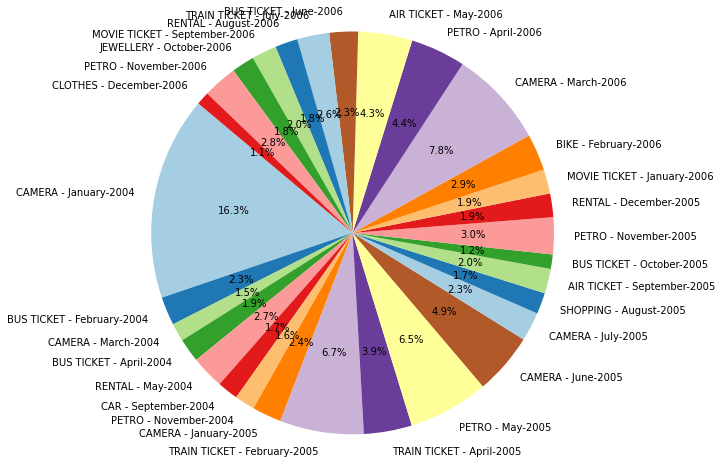

In [89]:
category_spend['Label'] = category_spend['Type'] + ' - ' + category_spend['Month']

plt.figure(figsize=(8, 8))
plt.pie(category_spend['Amount'], labels=category_spend['Label'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.show()

#### Save the dataframe in a new csv file

In [90]:
# category_spend.to_csv('Task7.csv')

## Task 8-Impose an interest rate of 2.9% for each customer for any due amount.


We have to find the due amount for all customer transactions.

**Balance=Amount Spent-Amount Repaid**  
**Interest=Balance*Interest Rate**  
**Due Amount=Balance+Interest**

First make a dataframe with both spent amount and repaid amount

In [91]:
due_amount=spend.copy()
due_amount.rename(columns={'Amount':'Spend'},inplace=True)
col=repayment['Amount']
due_amount['Repayment']=col
due_amount.drop(columns=['Type','year_month'],inplace=True)
due_amount=due_amount[['Customer','Month','Spend','Repayment']]

In [92]:
due_amount.head()

,Customer,Month,Spend,Repayment
0,A1,2004-01-12,473776,331844.00740
1,A1,2004-01-03,335579,441139.80730
2,A1,2004-01-15,371041,32480.00401
3,A1,2004-01-25,141178,90636.96653
4,A1,2004-01-12,52225,390074.79000


Now, find the due amount

In [93]:
due_amount['Balance']=due_amount['Spend']-due_amount['Repayment']

The interest will only be on positive entries of Balance

In [94]:
interest_rate=2.9/100
due_amount['Interest'] = due_amount['Balance'].apply(lambda x: x *interest_rate  if x > 0 else 0)
due_amount['Due Amount'] = due_amount.apply(lambda row: row['Balance'] + row['Interest'] if row['Balance'] > 0 else 0,axis=1)

### OUTPUT

In [95]:
due_amount

,Customer,Month,Spend,Repayment,Balance,Interest,Due Amount
0,A1,2004-01-12,473776,331844.00740,141931.99260,4116.027785,146048.020385
1,A1,2004-01-03,335579,441139.80730,-105560.80730,0.000000,0.000000
2,A1,2004-01-15,371041,32480.00401,338560.99599,9818.268884,348379.264874
3,A1,2004-01-25,141178,90636.96653,50541.03347,1465.689971,52006.723441
4,A1,2004-01-12,52225,390074.79000,-337849.79000,0.000000,0.000000
...,...,...,...,...,...,...,...
1495,A96,2004-01-25,320364,110139.01410,210224.98590,6096.524591,216321.510491
1496,A97,2004-01-12,164330,174606.39230,-10276.39230,0.000000,0.000000
1497,A98,2004-01-03,87484,97802.59900,-10318.59900,0.000000,0.000000
1498,A99,2004-01-15,476020,358589.92430,117430.07570,3405.472195,120835.547895


#### Save the dataframe in a new file

In [96]:
# due_amount.to_csv('Task8.csv')

## Task 9- Monthly profit for the bank

To find the monthly profit, we just have to compute the balance of each customer transaction, interest on it and the amount to be paid by customers; but at the same time we have to take care of the people who have negative balance as that would decrease the monthly profit.

Firstly, create a dataframe with both spent and repaid amount.

In [97]:
profit=spend.copy()
profit.rename(columns={'Amount':'Spend'},inplace=True)
col=repayment['Amount']
profit['Repayment']=col
profit.drop(columns=['Type','Month'],inplace=True)
profit=profit[['Customer','year_month','Spend','Repayment']]

In [98]:
profit.head()

,Customer,year_month,Spend,Repayment
0,A1,2004-01,473776,331844.00740
1,A1,2004-01,335579,441139.80730
2,A1,2004-01,371041,32480.00401
3,A1,2004-01,141178,90636.96653
4,A1,2004-01,52225,390074.79000


#### Calculate the necesaary profit/loss for each transaction

In [99]:
profit['Balance']=profit['Spend']-profit['Repayment']

In [100]:
interest_rate=2.9/100
profit['Interest'] = profit['Balance'].apply(lambda x: x *interest_rate  if x > 0 else 0)
profit['Profit/Loss'] = profit.apply(lambda row: row['Balance'] + row['Interest'] if row['Balance'] > 0 else row['Balance'],axis=1)

In [101]:
profit.head()

,Customer,year_month,Spend,Repayment,Balance,Interest,Profit/Loss
0,A1,2004-01,473776,331844.00740,141931.99260,4116.027785,146048.020385
1,A1,2004-01,335579,441139.80730,-105560.80730,0.000000,-105560.807300
2,A1,2004-01,371041,32480.00401,338560.99599,9818.268884,348379.264874
3,A1,2004-01,141178,90636.96653,50541.03347,1465.689971,52006.723441
4,A1,2004-01,52225,390074.79000,-337849.79000,0.000000,-337849.790000


#### Drop the unnecessary columns

In [102]:
profit.drop(columns=['Spend','Repayment','Balance','Interest'],inplace=True)

In [103]:
profit.head()

,Customer,year_month,Profit/Loss
0,A1,2004-01,146048.020385
1,A1,2004-01,-105560.807300
2,A1,2004-01,348379.264874
3,A1,2004-01,52006.723441
4,A1,2004-01,-337849.790000


Now we have the profit/loss for each transaction and all we have to do is just find the monthly profit.

In [104]:
monthly_profit = profit.groupby([ 'year_month']).sum('Profit/Loss').reset_index()
monthly_profit=monthly_profit.round()

#### Make it more appropriate to see

In [105]:
monthly_profit['year_month']=pd.to_datetime(monthly_profit['year_month'])
monthly_profit['Year'] = monthly_profit['year_month'].dt.year
monthly_profit['Month'] = monthly_profit['year_month'].dt.month
monthly_profit['Month'] = monthly_profit['Month'].apply(lambda x: calendar.month_name[x])
monthly_profit.drop(columns=['year_month'],inplace=True)
monthly_profit = monthly_profit[['Month', 'Year', 'Profit/Loss']]
monthly_profit['Month'] = monthly_profit['Month'].astype(str) + '-' + monthly_profit['Year'].astype(str)
monthly_profit.drop(columns=['Year'],inplace=True)
monthly_profit.reset_index(drop=True, inplace=True)

### OUTPUT

In [106]:
monthly_profit

,Month,Profit/Loss
0,January-2004,3713226.0
1,February-2004,1297652.0
2,March-2004,-651141.0
3,April-2004,-370756.0
4,May-2004,1019093.0
5,September-2004,332868.0
6,November-2004,39817.0
7,January-2005,185289.0
8,February-2005,-899428.0
9,April-2005,1223768.0


Please note that the negative enteries in the column indicate that there has been a net loss in the respective month.

#### Save the dataframe in a new file

In [107]:
# monthly_profit.to_csv('Task9.csv')